<a href="https://colab.research.google.com/github/KaishvaShah/EE610_ImageProcessing/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

# Question 1

(868, 1156, 3)


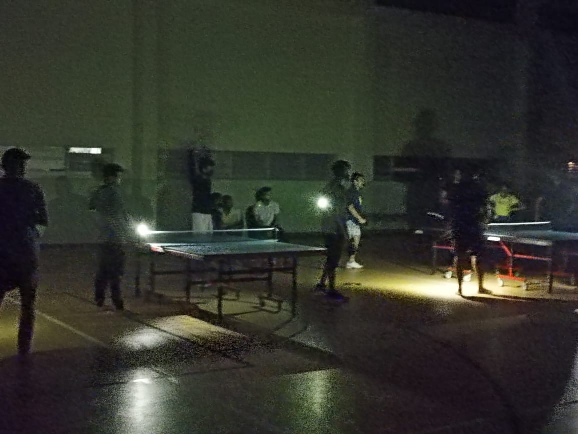

(434, 578, 3)


In [ ]:
img=cv2.imread('/content/Q1.jpeg')
print(img.shape)
img1 = cv2.resize(img, (578, 434),
               interpolation = cv2.INTER_NEAREST)
#https://www.geeksforgeeks.org/image-resizing-using-opencv-python/ used to resize the original image of (868, 1156, 3) to (434, 578, 3) using opencv
cv2_imshow(img1)
print(img1.shape)

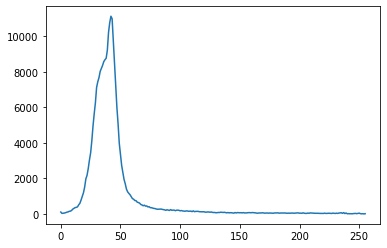

In [ ]:
from matplotlib import pyplot as plt
#cv2.calcHist(images, channels, mask, histSize, ranges)
hist = cv2.calcHist([img1],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
#Plotting the histograms for the black and white image

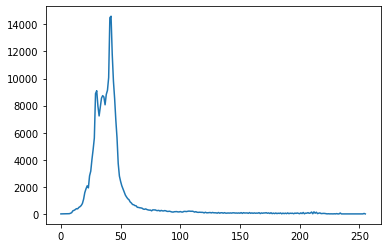

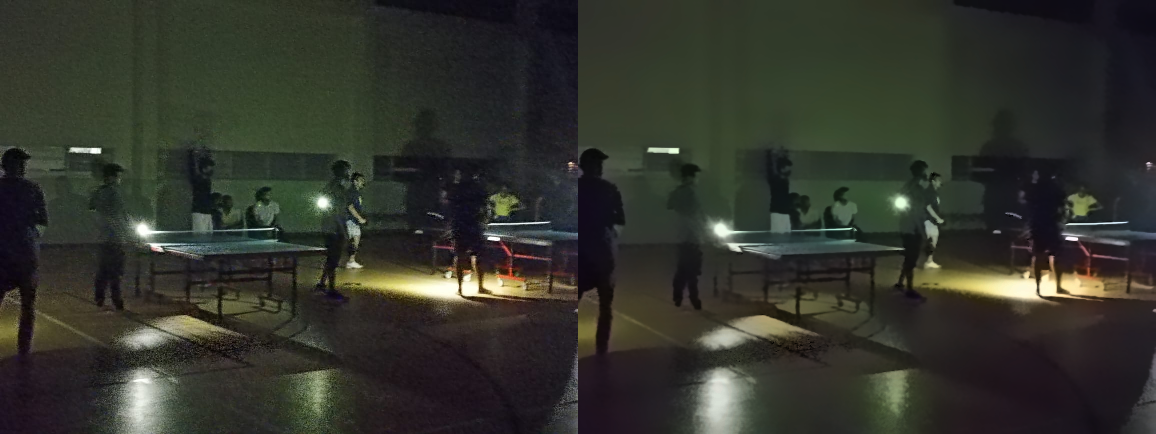

In [ ]:
denoised = cv2.fastNlMeansDenoisingColored(img1, None, 15, 15, 3, 21) 
#https://docs.opencv.org/3.4/d5/d69/tutorial_py_non_local_means.html to get a denoised image for gaussian noise.
hist = cv2.calcHist([denoised],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
horizontal_concat = np.concatenate((img1, denoised), axis=1)
cv2_imshow(horizontal_concat)

As you can see the image has a much better histogram as we have removed the noise (gaussian) to some extent.

In [ ]:
#from skimage import exposure
#ref = cv2.imread('/content/Q1_histogrammatch.jpg')
#multi = True if img.shape[-1] > 1 else False
#https://scikit-image.org/docs/stable/api/skimage.exposure.html
#skimage.exposure.match_histograms(image, reference, *, channel_axis=None, multichannel=False)
#matched = exposure.match_histograms(denoised, ref, multichannel=multi)
#print(matched)
#cv2_imshow(ref)
#cv2_imshow(matched)

# Question 2

(477, 320)


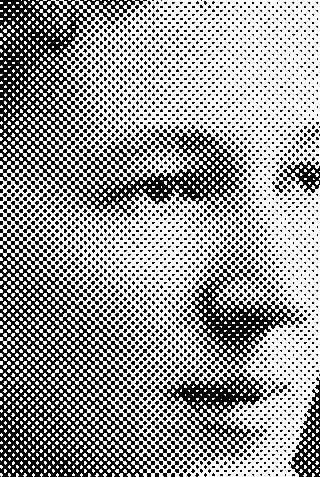

In [ ]:
img=cv2.imread('/content/Q2.jpg',0)
print(img.shape)
cv2_imshow(img)

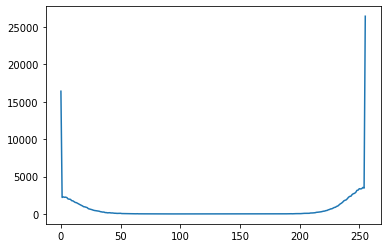

In [ ]:
#cv2.calcHist(images, channels, mask, histSize, ranges)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
#Plotting the histograms for the black and white image

(477, 320, 2)


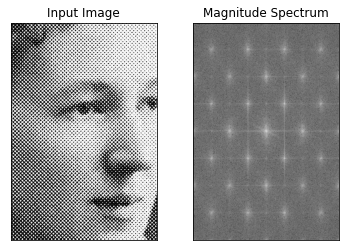

In [ ]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT) 
#converting the image to the required type before applying cv2.dft on it.
#Gives 2 output channels. One is the real part and one is the imaginary part.
dft_shift = np.fft.fftshift(dft)
#To shift the zero-frequency component to the center of the spectrum.
print(dft_shift.shape)
#As discussed before, has size img,2 because it has 2 output channels, the real part and the imaginary part.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
#here we find the magnitude in decibel scale by giving 2 input channels, the real part and the imaginary part.
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

As we can see from the fourier transform of the image we have too many ink-dots that correspond to spots on the fourier transform image, we can actually take a low pass filter and see what that gives us.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


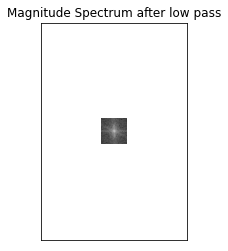

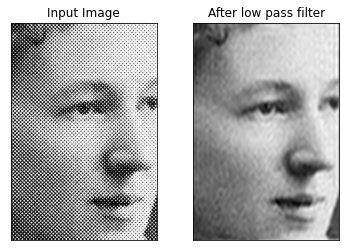

In [ ]:
rows, cols = img.shape
crow,ccol = int((rows+1)/2) ,int((cols)/2)

mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
#we are creating a mask of the same size of the image by giving it value 1 in the low frequency region and 0 in the high frequency region.
fshift = dft_shift*mask
#once multiplied we have essentially removed the high frequency elements in the frequency domain as seen in the fourier transform image.
magnitude_spectrum = 20*np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum after low pass'), plt.xticks([]), plt.yticks([])
plt.show()
#applying inverse fourier transform on the new fourier transform.
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back1 = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back1, cmap = 'gray')
plt.title('After low pass filter'), plt.xticks([]), plt.yticks([])
plt.show()

Clearly this photo is now much better because of the low pass filtering

# Question 3

<class 'numpy.ndarray'>
(551, 680, 3)


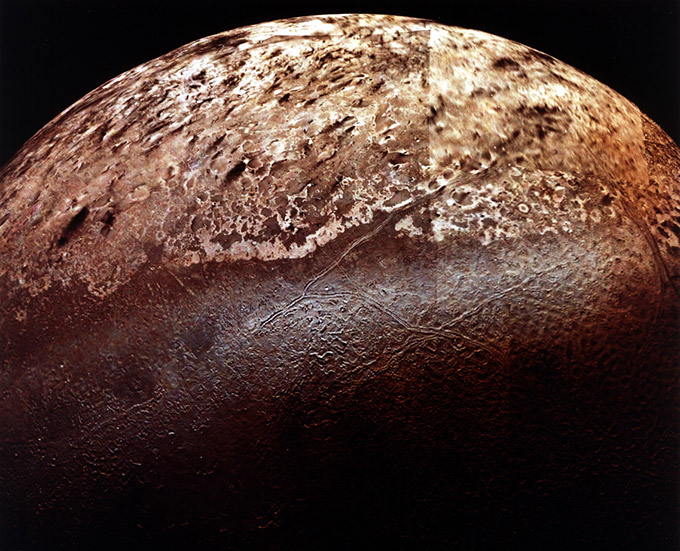

In [ ]:
imgQ3=cv2.imread('/content/Q3.jpg')
print(type(imgQ3))
print(imgQ3.shape)
cv2_imshow(imgQ3)
imgbnw=cv2.imread('/content/Q3.jpg',0)

In [ ]:
img1=imgQ3[:,:,0]
img2=imgQ3[:,:,1]
img3=imgQ3[:,:,2]

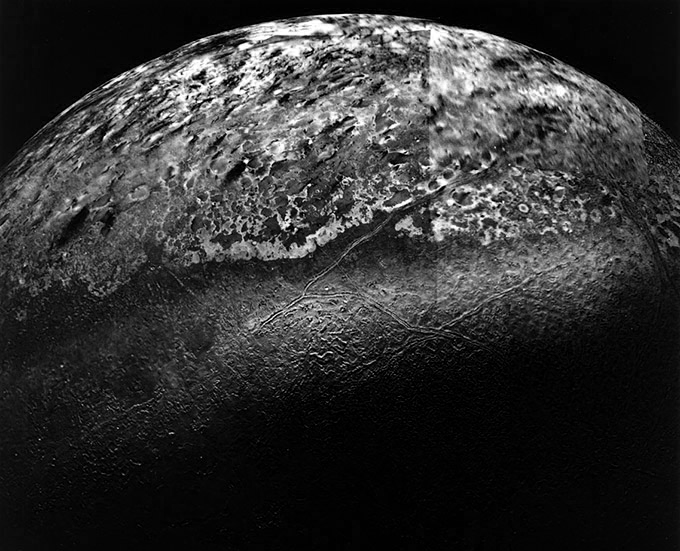

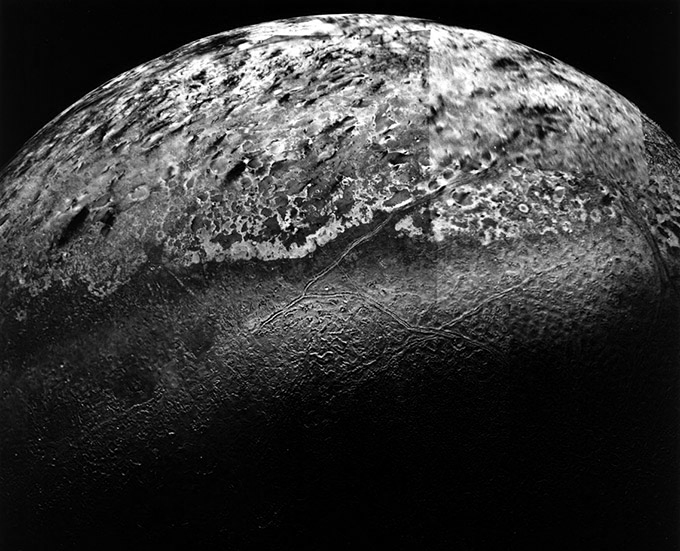

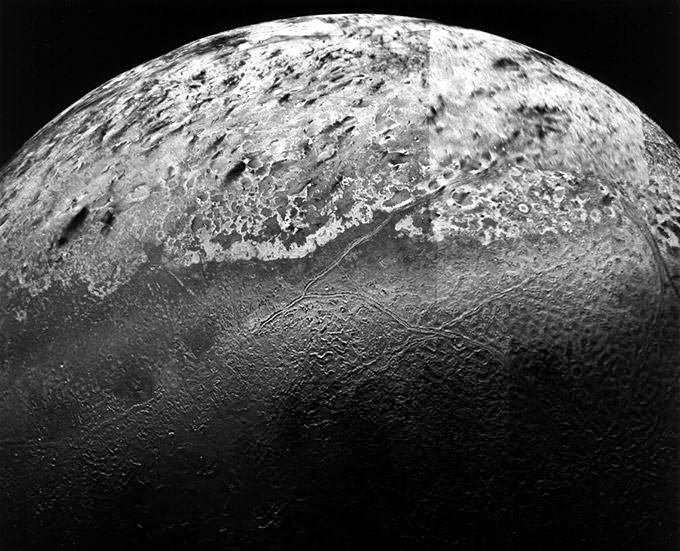

In [ ]:
cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(img3)

In [ ]:
def f_if(img):
  dft1 = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
  dft_shift1 = np.fft.fftshift(dft1)
  rows, cols = img.shape
  crow,ccol = int((rows+1)/2) ,int((cols)/2)

  mask = np.ones((rows,cols,2),np.uint8)
  mask[crow-6:crow+6, ccol-1200:ccol-20] = 0
  mask[crow-6:crow+6, ccol+20:ccol+1200] = 0
  #we are creating a mask of the same size of the image by giving it value 1 in the low frequency region and 0 in the high frequency region.
  fshift1 = dft_shift1*mask
  #once multiplied we have essentially removed the high frequency elements in the frequency domain as seen in the fourier transform image.
  magnitude_spectrum1 = 20*np.log(cv2.magnitude(fshift1[:,:,0],fshift1[:,:,1]))
  plt.subplot(122),plt.imshow(magnitude_spectrum1)
  plt.title('Magnitude Spectrum after low pass'), plt.xticks([]), plt.yticks([])
  plt.show()
  f_ishift1 = np.fft.ifftshift(fshift1)
  img_back = cv2.idft(f_ishift1)
  img_back_1 = (cv2.magnitude(img_back[:,:,0],img_back[:,:,1]))
  a=np.max(img_back_1)
  img_back_1=(img_back_1/a)*255
  print(img_back_1)
  #imgQ3[:,:,0]=img_back1
  plt.subplot(121),plt.imshow(img, cmap='gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])
  #plt.subplot(122),plt.imshow(img_back_1, cmap='gray')
  #plt.title('After masking'), plt.xticks([]), plt.yticks([])
  plt.show()
  cv2_imshow(img_back_1)
  return img_back_1
#applying inverse fourier transform on the new fourier transform.


In [ ]:
img_backr=f_if(img1/255)
img_backg=f_if(img2/255)
img_backb=f_if(img3/255)

NameError: ignored

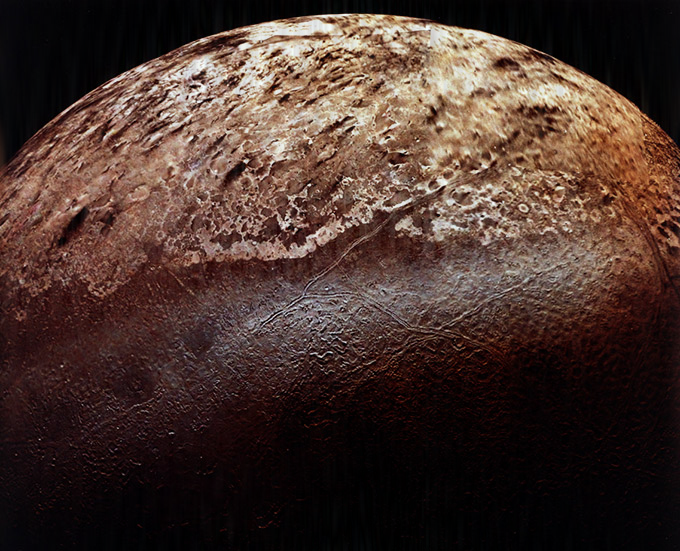

In [ ]:
imgQ3[:,:,0]=img_backr
imgQ3[:,:,1]=img_backg
imgQ3[:,:,2]=img_backb
cv2_imshow(imgQ3)


# Question 4

<class 'numpy.ndarray'>
(852, 1445)


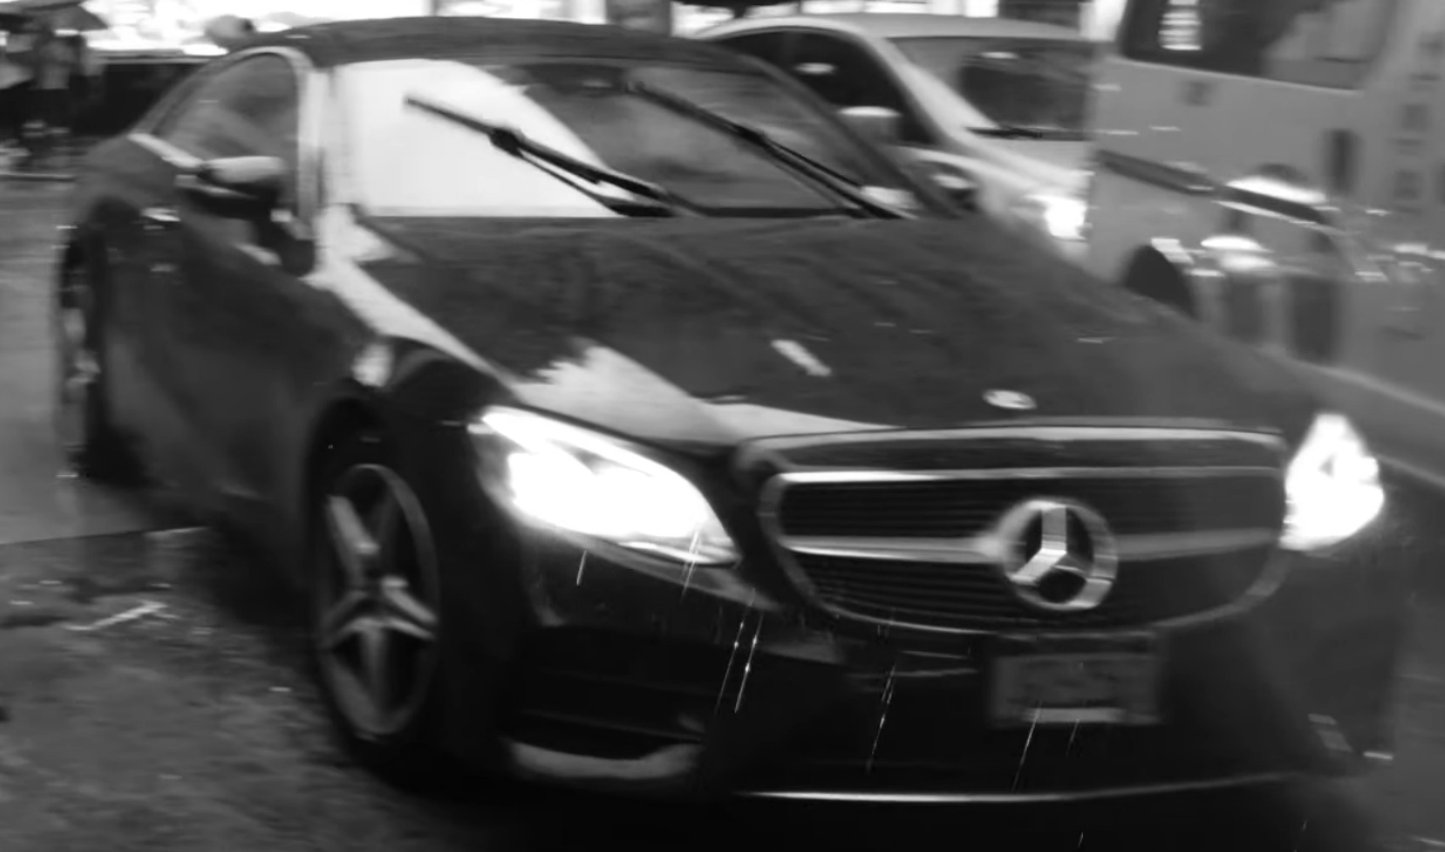

In [56]:
imgQ4=cv2.imread('/content/Q4.jpg',0)
print(type(imgQ4))
print(imgQ4.shape)
cv2_imshow(imgQ4)

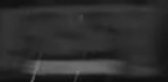

In [57]:
img_blur  = imgQ4[648:730,1000:1168]
cv2_imshow(img_blur)

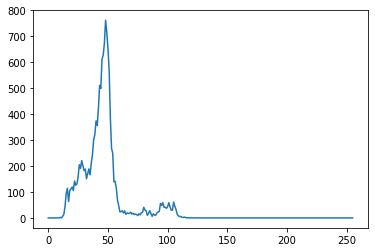

In [58]:
#cv2.calcHist(images, channels, mask, histSize, ranges)
hist = cv2.calcHist([img_blur],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
#Plotting the histograms for the black and white image

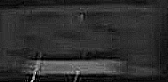

In [59]:
# Creating our sharpening filter
for i in range(1):
  filter1 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
  # Applying cv2.filter2D function on our Logo image
  sharpen_img_2=cv2.filter2D(img_blur,-1,filter1)
  cv2_imshow(sharpen_img_2)
  img_blur=sharpen_img_2
#sharpen_img_2=img_blur

In [65]:
def f(img):
  dft1 = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
  dft_shift1 = np.fft.fftshift(dft1)
  rows, cols = img.shape
  crow,ccol = int((rows+1)/2) ,int((cols)/2)

  mask = np.ones((rows,cols,2),np.uint8)
  #for i in range(80):
    #if(i<35 or i>70):
      #mask[i,int(4.5*i)-90]=0
  mask[:,ccol-82:ccol-10]=0
  mask[:,ccol+10:ccol+90]=0
  #cv2_imshow(mask)
  #we are creating a mask of the same size of the image by giving it value 1 in the low frequency region and 0 in the high frequency region.
  fshift1 = dft_shift1*mask
  #once multiplied we have essentially removed the high frequency elements in the frequency domain as seen in the fourier transform image.
  magnitude_spectrum1 = 20*np.log(cv2.magnitude(fshift1[:,:,0],fshift1[:,:,1]))
  plt.subplot(122),plt.imshow(magnitude_spectrum1)
  plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
  plt.show()
  f_ishift1 = np.fft.ifftshift(fshift1)
  img_back = cv2.idft(f_ishift1)
  img_back_1 = (cv2.magnitude(img_back[:,:,0],img_back[:,:,1]))
  a=np.max(img_back_1)
  img_back_1=(img_back_1/a)*255
  print(img_back_1)
  #imgQ3[:,:,0]=img_back1
  plt.subplot(121),plt.imshow(img, cmap='gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])
  #plt.subplot(122),plt.imshow(img_back_1, cmap='gray')
  #plt.title('After masking'), plt.xticks([]), plt.yticks([])
  plt.show()
  cv2_imshow(img_back_1)
  return img_back_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


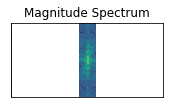

[[46.11184   42.67775   40.20987   ... 58.884827  54.482742  49.97267  ]
 [47.428658  41.61858   38.179703  ... 59.965244  56.85805   51.17802  ]
 [49.47943   43.006783  40.60129   ... 60.907635  58.622574  52.27896  ]
 ...
 [35.961334  32.94844   36.469326  ... 29.223768  33.922287  32.012127 ]
 [28.3872    33.869904  27.612371  ... 37.732704  30.828028  35.41757  ]
 [ 8.536252   6.8971424  3.378392  ... 24.94148   18.016766  14.977375 ]]


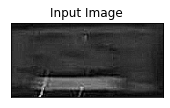

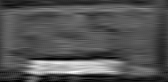

array([[46.11184  , 42.67775  , 40.20987  , ..., 58.884827 , 54.482742 ,
        49.97267  ],
       [47.428658 , 41.61858  , 38.179703 , ..., 59.965244 , 56.85805  ,
        51.17802  ],
       [49.47943  , 43.006783 , 40.60129  , ..., 60.907635 , 58.622574 ,
        52.27896  ],
       ...,
       [35.961334 , 32.94844  , 36.469326 , ..., 29.223768 , 33.922287 ,
        32.012127 ],
       [28.3872   , 33.869904 , 27.612371 , ..., 37.732704 , 30.828028 ,
        35.41757  ],
       [ 8.536252 ,  6.8971424,  3.378392 , ..., 24.94148  , 18.016766 ,
        14.977375 ]], dtype=float32)

In [66]:
f(img_blur)

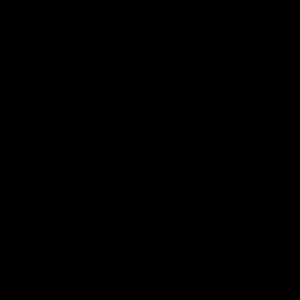

In [71]:
psf = np.ones((300,300),np.uint8)
for i in range(300):
  psf[i,(i+1)%300]=0
psf=psf*255/76500
cv2_imshow(psf)

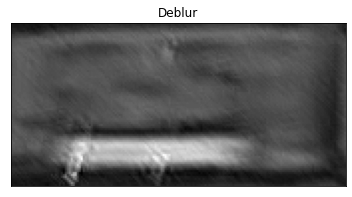

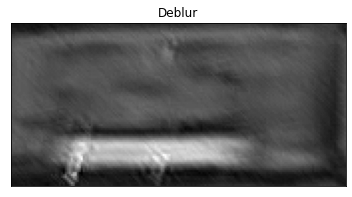

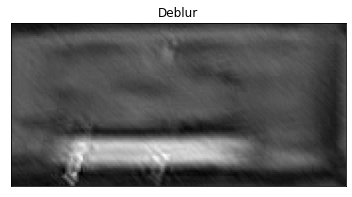

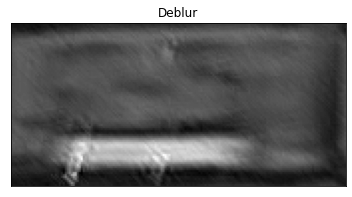

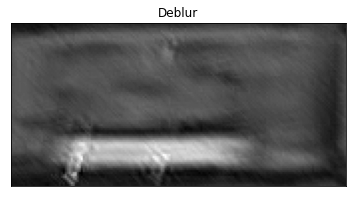

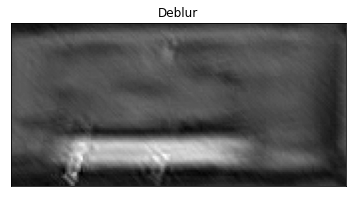

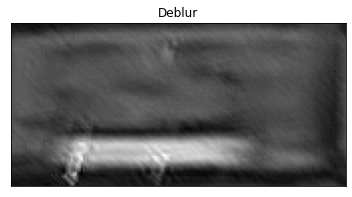

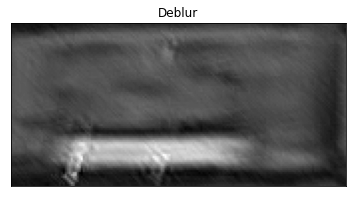

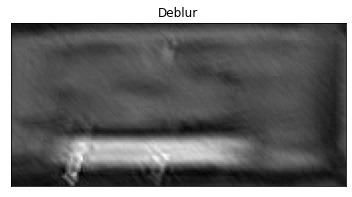

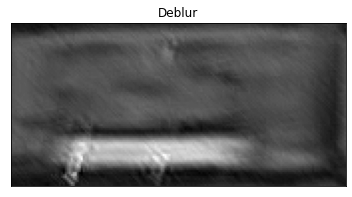

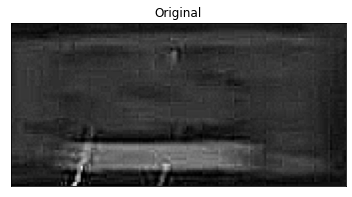

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


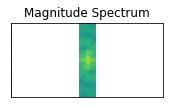

[[47.880676 44.47442  41.41489  ... 61.627754 56.619495 52.182793]
 [48.041676 44.236893 40.970245 ... 61.39785  56.77643  52.28375 ]
 [48.537113 45.47224  42.498928 ... 61.018993 56.472363 52.552956]
 ...
 [35.77083  36.02357  34.207123 ... 44.309853 40.124226 38.972626]
 [37.879116 35.28793  35.4256   ... 47.533867 44.13478  39.780064]
 [42.18352  38.961945 37.13974  ... 54.79278  50.274914 45.671608]]


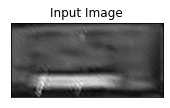

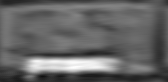

array([[47.880676, 44.47442 , 41.41489 , ..., 61.627754, 56.619495,
        52.182793],
       [48.041676, 44.236893, 40.970245, ..., 61.39785 , 56.77643 ,
        52.28375 ],
       [48.537113, 45.47224 , 42.498928, ..., 61.018993, 56.472363,
        52.552956],
       ...,
       [35.77083 , 36.02357 , 34.207123, ..., 44.309853, 40.124226,
        38.972626],
       [37.879116, 35.28793 , 35.4256  , ..., 47.533867, 44.13478 ,
        39.780064],
       [42.18352 , 38.961945, 37.13974 , ..., 54.79278 , 50.274914,
        45.671608]], dtype=float32)

In [68]:
import scipy.fft


def wiener_filter(img, psf, K):
  psf /= np.sum(psf)
  dummy=np.copy(img) 
  dummy=scipy.fft.fft2(dummy)
  psf = scipy.fft.fft2(psf, s=img.shape)
  psf = np.conj(psf) / (np.abs(psf)**2+K)
  dummy = dummy*psf
  dummy= np.abs(scipy.fft.ifft2(dummy))
  return dummy
#psf = np.zeros((6, 6))
#psf = np.zeros((6, 6))
psf = np.ones((6,6),np.uint8)
for i in range(6):
  psf[i,(i+1)%6]=0
psf=psf*255/1530
cv2_imshow(psf)
for i in range(10):
  tran1 =  wiener_filter(sharpen_img_2, psf, K=20*(i+1)) 
  plt.imshow(tran1*255, cmap='gray')
  plt.title('Deblur'), plt.xticks([]), plt.yticks([])
  plt.show()
plt.imshow(sharpen_img_2, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()
f(tran1)
  #img=tran1

# Question 5